# Image Processing - SCC5830. 

# Final Project - Segmenting and identify cells between red blood cells and white blood cells in microscope images with Image Processing Techniques

Author:
* Gianella A. Milon (USP Number: 12126062)

Semester 1, Year: 2021

# Abstract

In this work, blood cells are analyzed in order to obtain useful information for a medical analysis, analyzes that were performed was highlight the WBC (using image processing techniques) and, detect and count RBC (using deep learning). The results show that red and white cells can be identified. 

# Main Objetive

Segmenting and identify red (RBC) and white (WBC) blood cells in microscopic photographs using image processing tecniques.

# Dataset

A database named _complete blood count (CBC) dataset_ have 360 images of blood smear images. It was created and is maintained by Mahmudul Alam. The dataset is modified and prepared for the paper of _automatic identification and counting of blood cells_, this paper use maching learning and the framework "you only look once" (YOLO) to identify the cells of the image, like a next image: 

![alt text](https://user-images.githubusercontent.com/37298971/46539603-c77ab900-c8d8-11e8-9e48-e6c054f8af3b.jpg)

But the original dataset have 410 images.

- Website: [https://mahmudulalam.github.io/Complete-Blood-Cell-Count-Dataset/](url)
- Paper: [https://ietresearch.onlinelibrary.wiley.com/doi/10.1049/htl.2018.5098](url)
- GitHub: [https://github.com/MahmudulAlam/Complete-Blood-Cell-Count-Dataset](url)


In [1]:
import cv2
import imageio
import numpy as np
import matplotlib as mpl
from skimage import feature
import matplotlib.pyplot as plt

## 1. Loading Example images to work with

Loading Images from the folder: "CBC/Testing/Images", and use it as examples for this proposed method.

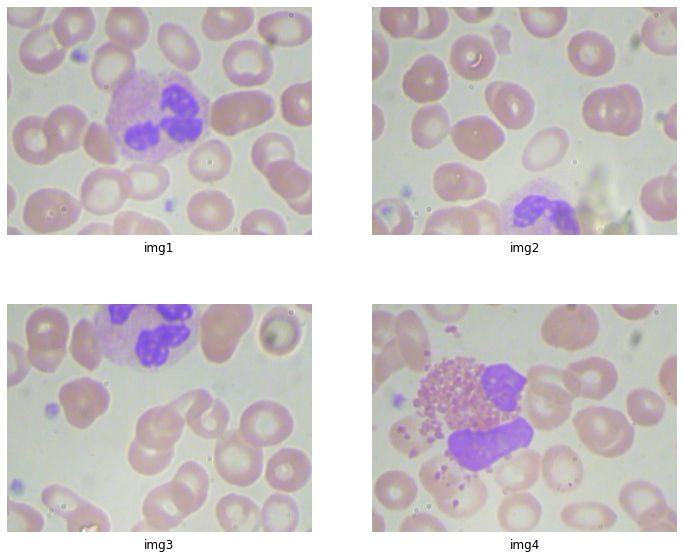

In [3]:
img1 = imageio.imread('CBC/Testing/Images/BloodImage_00339.jpg')
img2 = imageio.imread('CBC/Testing/Images/BloodImage_00340.jpg')
img3 = imageio.imread('CBC/Testing/Images/BloodImage_00343.jpg')
img4 = imageio.imread('CBC/Testing/Images/BloodImage_00344.jpg')

imgs = [img1, img2, img3, img4]
names = ['img1', 'img2', 'img3', 'img4']

plt.figure(figsize=(12,10))
for i, img in enumerate(imgs):
    plt.subplot(2,2,i+1)
    plt.axis('off')
    plt.title(names[i], y=-0.10)
    plt.imshow(img)

# Pipeline

1. White Blood Cells (RBC) Analysis

    1.1 Algorithm

        1.1.1 HSV-scale Conversion

        1.1.2 Extract the Saturation channel 

        1.1.3 Normalization [0...256]

        1.1.4 Highlight the WBC using Threshold

        1.1.5 Matematical Morphology: Closing

    1.2 Processing Time

2. Red Blood Cells (RBC) Analysis

    2.1 Deep Learning Model Description

    2.2 Dataset

    2.3 Hardware Information

    2.4 Results 

# Implementation and Results

## 1. White Blood Cells (RBC) Analysis

### 1.1 Algorithm

#### 1.1.1 Convert the color space from RGB to HSV

Convert the images from the RGB space to the HSV space (Hue, Saturation and Value) is the firststep in order to work in only one channel. In this work we use the saturation channel.



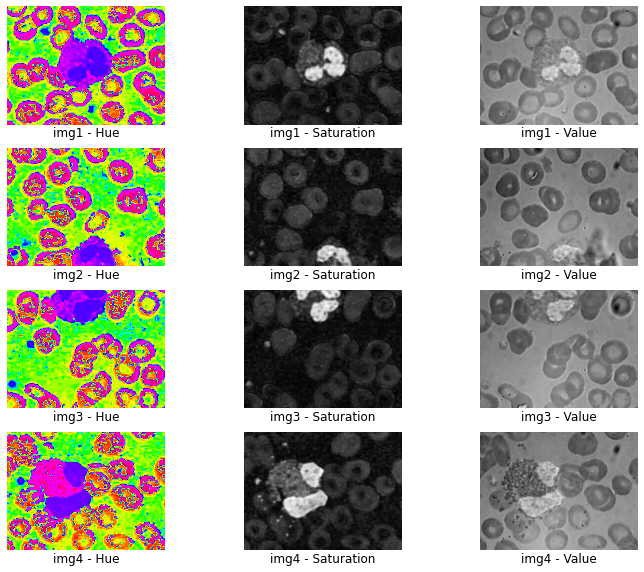

In [4]:
imgs_hsv = [mpl.colors.rgb_to_hsv(img) for img in imgs]
hsv_str = ['Hue', 'Saturation', 'Value']

plt.figure(figsize=(12,10))
cont = 1
for i, img in enumerate(imgs):
    for j in range(3):
        plt.subplot(4,3,cont)
        cont += 1
        plt.axis('off')
        plt.title(names[i] + ' - ' + hsv_str[j], y=-0.15)
        plt.imshow(imgs_hsv[i][:,:,j], cmap="hsv" if j == 0 else "gray")

#### 1.1.2 Extract the Saturation channel 

We found the saturation channel is the best option in order to solve this problem.

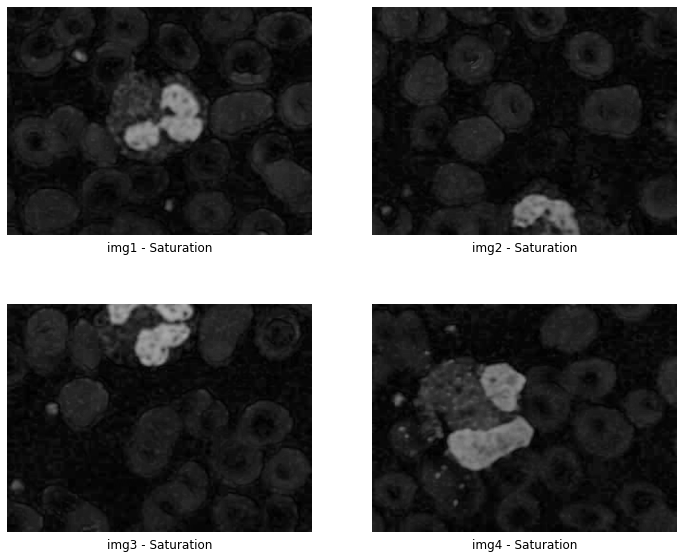

In [5]:
imgs_s = [img[:,:,1] for img in imgs_hsv]

plt.figure(figsize=(12,10))
for i, img in enumerate(imgs_s):
    plt.subplot(2,2,i+1)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Saturation', y=-0.10)
    plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 1)

#### 1.1.3 Normalization [0...256]

The normalization is necessary to standardize the image between 0 and 255, because the saturation channel is in the range of 0 to 1, and we need the standarization to select the threshold for the next step.  

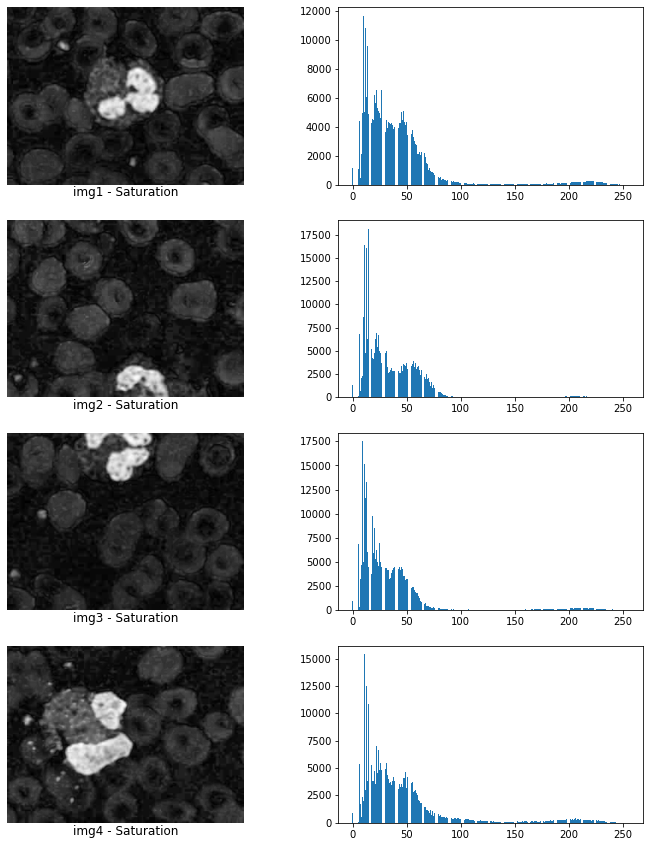

In [6]:
imgs_n = [cv2.normalize(img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F) for img in imgs_s]
hists  = [np.histogram(img, bins=256, range=(0,256))[0] for img in imgs_n]

plt.figure(figsize=(12,15))
cont = 1
for i, img in enumerate(imgs_n):
    plt.subplot(4,2,cont)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Saturation', y=-0.10)
    plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
    
    plt.subplot(4,2,cont + 1)
    plt.bar(np.arange(0,256), hists[i])
    cont += 2

#### 1.1.4 Highlight the WBC using Threshold

With the normalized values, we can apply a threshold to turn values close to 0 to values exactly 0, and the values close to 255 to values exactly in 255, and thus obtain values of 0 or 255, the threshold was chosen based on the histogram obtained from the image.


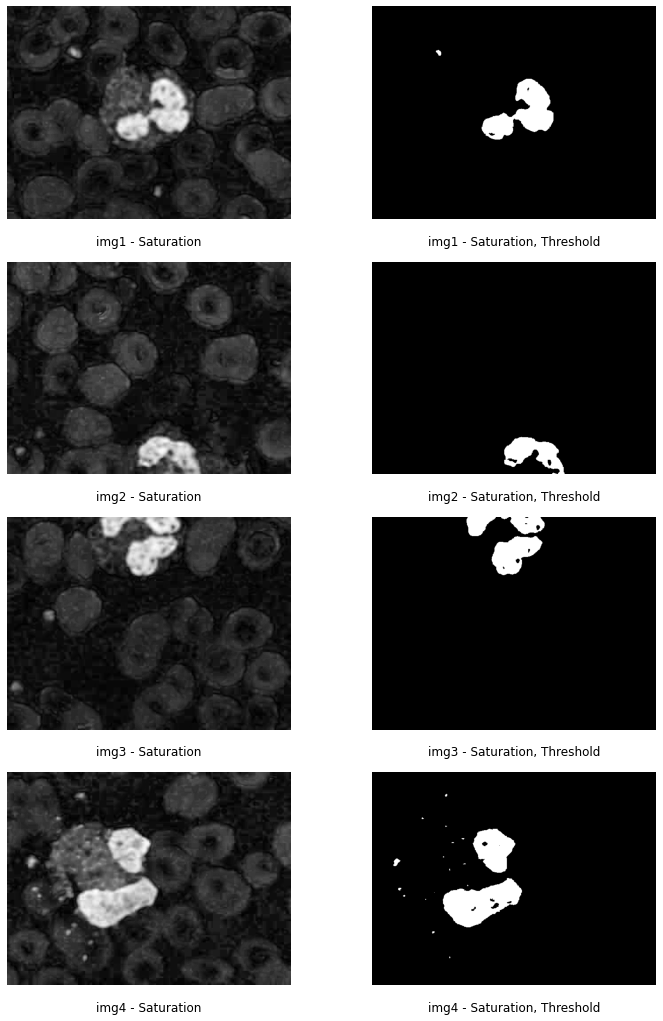

In [7]:
imgs_thrs = []

thrs = 150
plt.figure(figsize=(12,18))
cont = 1
for i, img in enumerate(imgs_n):
    img_thrs = img.copy()
    img_thrs[img <= thrs] = 0
    img_thrs[img > thrs] = 255
    imgs_thrs.append(img_thrs)
    
    plt.subplot(4,2,cont)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Saturation', y=-0.15)
    plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
    
    plt.subplot(4,2,cont + 1)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Saturation, Threshold', y=-0.15)
    plt.imshow(img_thrs, cmap = 'gray', vmin = 0, vmax = 255)
    cont += 2

#### 1.1.5 Matematical Morphology: Closing

The  next  step  is  apply  mathematical  morphology,  we use a rectangle structuring element of size 10x10 and perform the operations of dilation and erosion, these operations together are called “Closing”. We use this technique to fill the imperfections in the WBC.


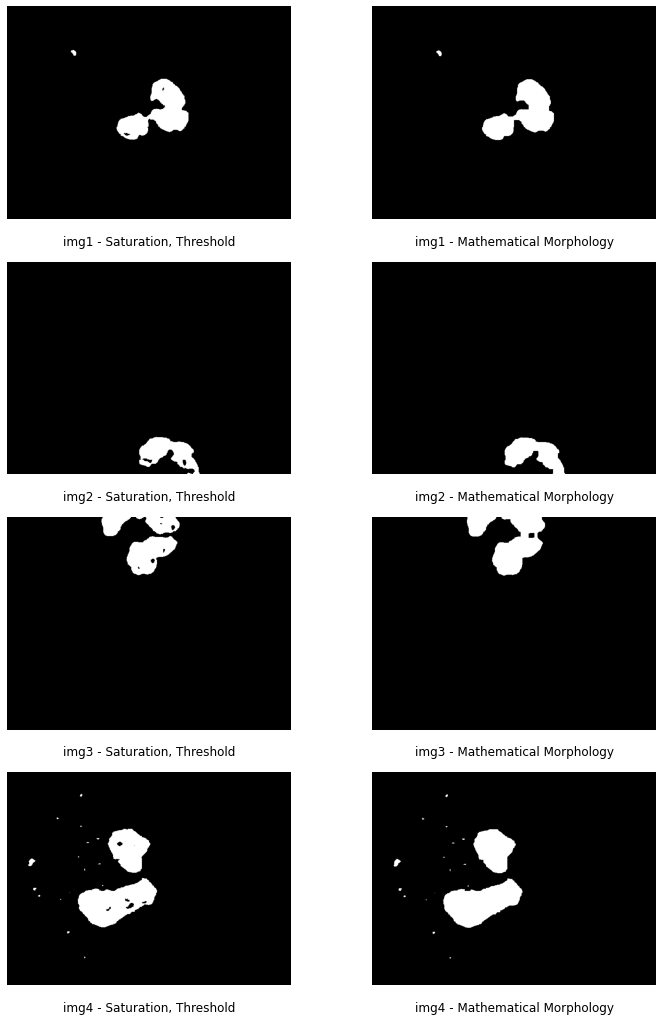

In [8]:
imgs_closing = [cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((10,10),np.uint8)) for img in imgs_thrs]

plt.figure(figsize=(12,18))
cont = 1
for i, img in enumerate(imgs_closing):    
    plt.subplot(4,2,cont)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Saturation, Threshold', y=-0.15)
    plt.imshow(imgs_thrs[i], cmap = 'gray', vmin = 0, vmax = 255)
    
    plt.subplot(4,2,cont + 1)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Mathematical Morphology', y=-0.15)
    plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
    cont += 2

## 1.1.6 Get the edges from the White blood cells

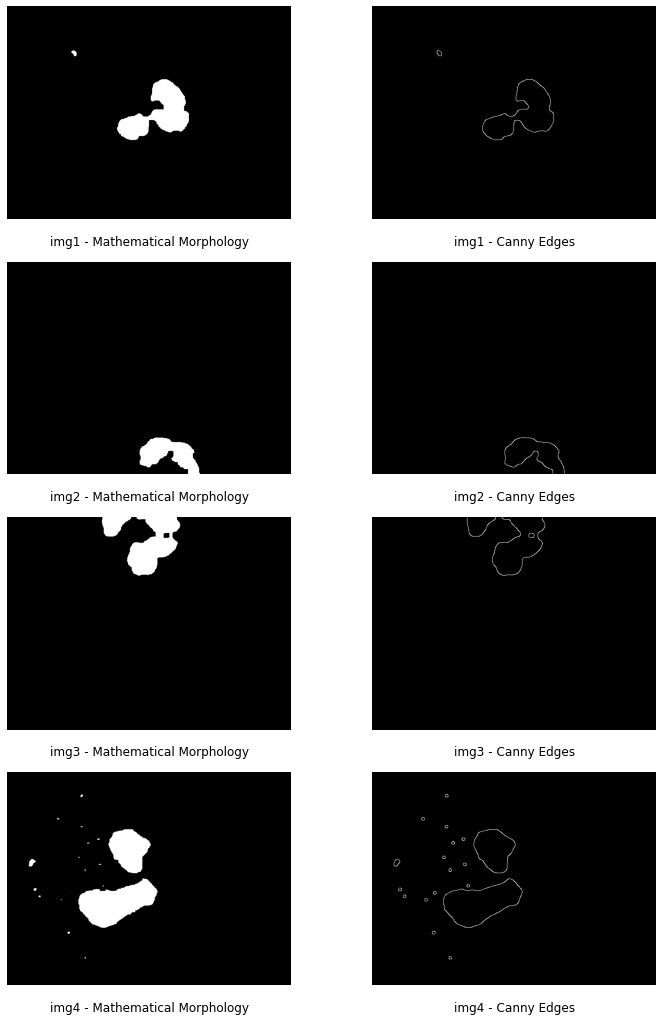

In [9]:
imgs_edges = [feature.canny(img, sigma=3) for img in imgs_closing]

plt.figure(figsize=(12,18))
cont = 1
for i, img in enumerate(imgs_edges):    
    plt.subplot(4,2,cont)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Mathematical Morphology', y=-0.15)
    plt.imshow(imgs_closing[i], cmap = 'gray', vmin = 0, vmax = 255)
    
    plt.subplot(4,2,cont + 1)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Canny Edges', y=-0.15)
    plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 1)
    cont += 2

### 1.1.7 Highlight the white Blood cells in the original images

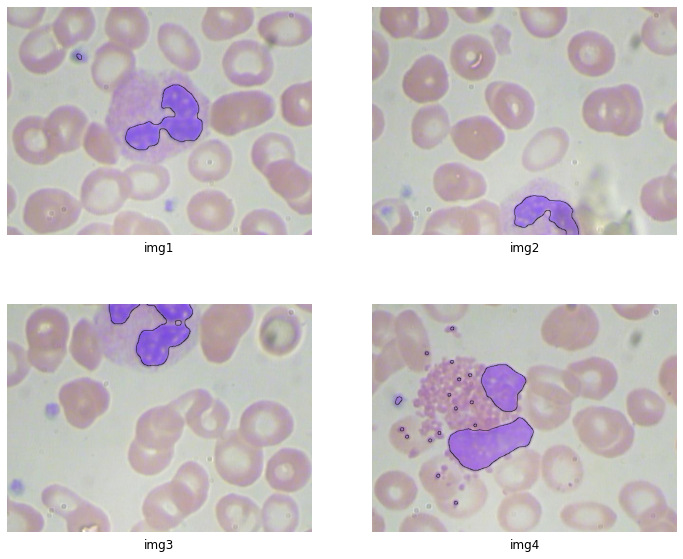

In [10]:
plt.figure(figsize=(12,10))
for i, img in enumerate(imgs):
    
    new_img = img.copy()
    new_img[imgs_edges[i]] = np.array([0,0,0])
    
    plt.subplot(2,2,i+1)
    plt.axis('off')
    plt.title(names[i], y=-0.10)
    plt.imshow(new_img)

### 1.2 Processing Time

Total images: 60

Total time with the algorithm: 5.9520 seconds

Average time: 99.1992 miliseconds

We can see the code [here](Notebooks/ProcessingTime.ipynb)


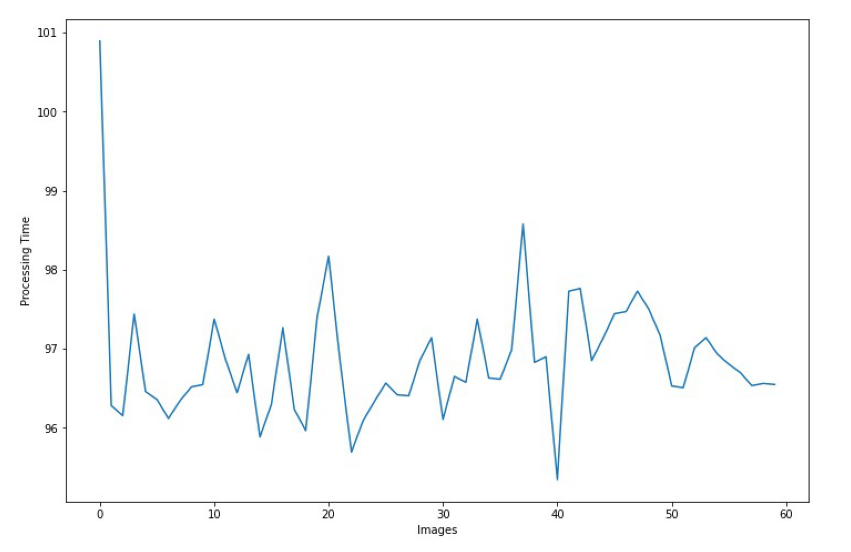

In [15]:
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(imageio.imread('Results/10.jpeg'))

## 2. Red Blood Cells (RBC) Analysis

### 2.1 Deep Learning Model Description

We apply the transfer learning technique by using a pre-trained neural network (ResNet) to predict the position of the RBC. 

### 2.2 Dataset

The CBC dataset came with a set of coordinates delimiting the blood cells in bounding boxes. So, we are going to use this bounding boxes as the output of the model.
(There is a few  images with invalid bounding boxes, we are getting rid of them.)

### 2.3 Hardware Information

All  the  experiments  has  been  performed  on  a  64bitsLinux Mint 19 Computer, with CPU IntelrCoreTMi7-7820X CPU @ 3.60GHz×16 and NVIDIA TITAN Xp GPU with 12G memory×1 and CUDA11.0.

### 2.4 Results 

After the training we test the blood cells detection in the CBC test dataset. 

We can notice that the WBC is not surrounded with a bounding box, this happened because in the dataset there is more RBC than WBC in the training images. 

We can see the code of this model [here](Notebooks/RedBloodCells.ipynb)

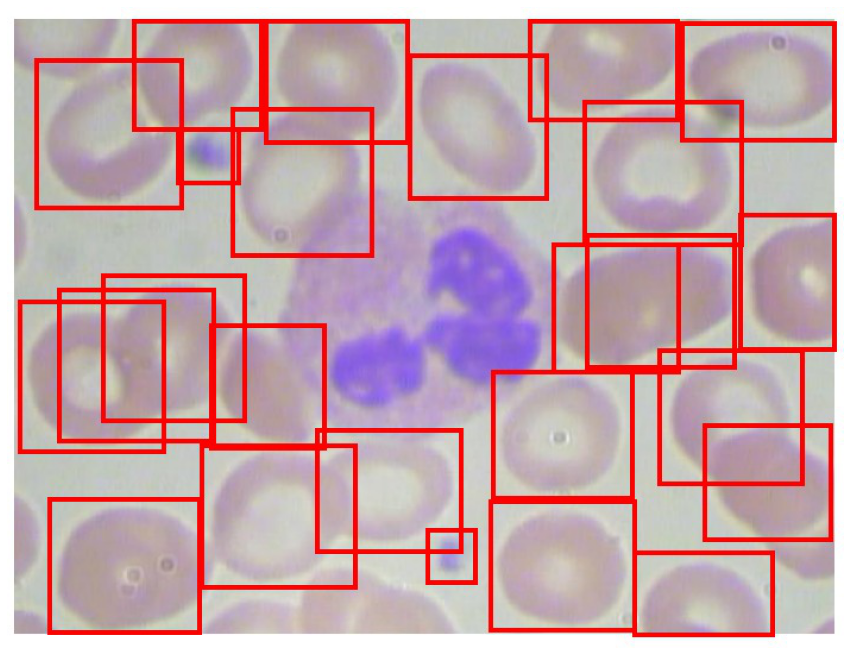

In [16]:
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(imageio.imread('Results/11.jpeg'))

# Disscussion of Results

## White Blood Cells

The result of the white blood cells analysis is the position of this cells highlighted in the image. By knowing the shape of this cells, the doctors can have a better understanding of what kind of White cell is (Monocytes, Lymphocytes, Neutrophils, etc).

## Red Blood Cells 

The result of the red blood cells analysis is the cells surrounded by bounding boxes, this cells can be counted and extracted in separated images. This can be useful to separate this kind of cells to focus the study in just some of them and not only in the hole image.

Counting the red blood cells can also be useful to perform a quick count of cells, to have a preliminar idea of the pacient status before performing more expensive tests (blood count test).

## Future Work 

1. Perform a deep classification in the white blood cells, so we can identify different kind of WBC.
2. Perform algorithms of data augmentation to allow the model to prerdict also the WBC and the Plaquetes instead of only the RBC.

## Failed Experiments

Apart of the previous explained processes, we performed some experiment that didn't lead to a good results. For example, work in the RGB channels, background subtraction, histogram operation and classification using descriptors. The code of these attemps is [here](Notebooks/FailedExperiments.ipynb)

# Participation of the Members

## Gianella A. Milon

- Seek for the dataset
- Analyse the dataset
- Investigation the techniques for the treatment of images
- Implementation of the techniques for the WBC 
- Investigation for the machine learning techniques
- Implementation of the techniques for the RBC
- Testing
- Document and organize information

# References

[1] OpenCV, https://opencv.org/

[2] A. Mohammad, I. Mohammad: Machine learning approach of automatic identification and counting of blood cells. In: 2019
The Institution of Engineering and Technology. vol.6, Issue 4 - p. 103-108 (july 2019). https://doi.org/10.1049/htl.2018.5098
